In [2]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Convolution1D, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard

# Using keras to load the dataset with the top_words
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad the sequence to the same length
max_review_length = 1600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

# Using embedding from Keras
embedding_vecor_length = 300
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(Convolution1D(64, 3, padding='same'))
model.add(Convolution1D(32, 3, padding='same'))
model.add(Convolution1D(16, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# Log to tensorboard
tensorBoardCallback = TensorBoard(log_dir='./logs', write_graph=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, callbacks=[tensorBoardCallback], batch_size=64, validation_data=(X_test, y_test))

# Evaluation on the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 326s 13ms/step - loss: 0.3802 - acc: 0.8242 - val_loss: 0.3804 - val_acc: 0.8307
Epoch 2/10
25000/25000 [==============================] - 331s 13ms/step - loss: 0.1610 - acc: 0.9403 - val_loss: 0.3670 - val_acc: 0.8627
Epoch 3/10
25000/25000 [==============================] - 328s 13ms/step - loss: 0.0566 - acc: 0.9812 - val_loss: 0.4881 - val_acc: 0.8570
Epoch 4/10
25000/25000 [==============================] - 328s 13ms/step - loss: 0.0291 - acc: 0.9902 - val_loss: 0.5630 - val_acc: 0.8560
Epoch 5/10
25000/25000 [==============================] - 328s 13ms/step - loss: 0.0260 - acc: 0.9908 - val_loss: 0.6360 - val_acc: 0.8451
Epoch 6/10
25000/25000 [==============================] - 323s 13ms/step - loss: 0.0247 - acc: 0.9913 - val_loss: 0.6829 - val_acc: 0.8575
Epoch 7/10
25000/25000 [==============================] - 319s 13ms/step - loss: 0.0145 - acc: 0.9951 - val_loss: 0.

In [ ]:
%%bash
# tensorboard --logdir='logs'

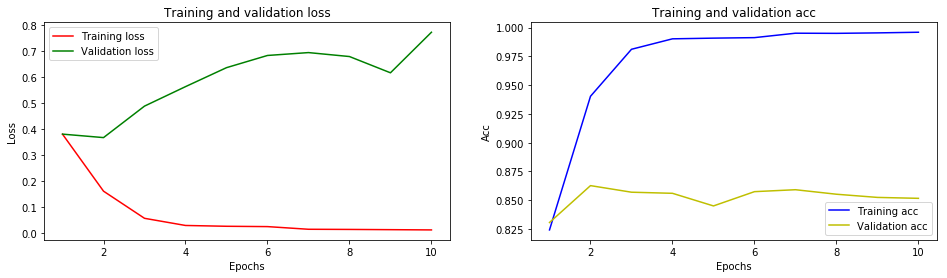

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_():
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']   
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16,4))
    plt.subplot(121)
    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'r', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(122)
    # "bo" is for "blue dot"
    plt.plot(epochs, acc, 'b', label='Training acc')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, 'y', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
#     plt.show()
plot_()